In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import math

In [2]:
pkls = glob.glob("*.pkl")
pkls

['pnl_r3_c05_d1.pkl',
 'pnl_r0_c0_d0.pkl',
 'dps.pkl',
 'pnl.pkl',
 'data.pkl',
 'pnl_r3_c0_d0.pkl',
 'pnl_r3_c0_d1.pkl']

In [3]:
pnl_rd = pd.read_pickle(pkls[-1])
pnl_r = pd.read_pickle(pkls[-2])
pnl_all = pd.read_pickle(pkls[0])
pnl_none = pd.read_pickle(pkls[1])

In [4]:
def find_Return(price):
    ret = (price - price.shift(1))/price
    ret = ret.drop(ret.index[0])
    # fill the nan values with 0
    ret = ret.fillna(value = 0)
    return ret

def find_Sharpe_Ratio(pnl,r=0):
    mean = math.log(pnl.iloc[len(pnl.index)-1]/pnl.iloc[0])/(len(pnl.index)) * 252.0
    print(mean)
    ret = find_Return(pnl)
    std = ret.std() * math.sqrt(252)
    return (mean - r)/std

def find_Maximum_Drawdown(pnl):
    ret = find_Return(pnl)
    r = ret.add(1).cumprod()
    dd = r.div(r.cummax()).sub(1)
    mdd = dd.min()
#     end = dd.argmin()
#     start = r.loc[:end].argmax()
    return mdd

def find_Cumulative_Return(pnl):
    return (pnl.iloc[len(pnl.index)-1] - pnl.iloc[0]) / pnl.iloc[0]

def get_all(pnl):
    print(f"Sharp Ratio is {find_Sharpe_Ratio(pnl)}, Maximum Dropdown is {find_Maximum_Drawdown(pnl)}, Cumulative Return is {find_Cumulative_Return(pnl)}")

In [5]:
get_all(pnl_none)

0.026315196606806517
Sharp Ratio is 0.3306436326085138, Maximum Dropdown is -0.09076923620704169, Cumulative Return is 0.13872040120693171


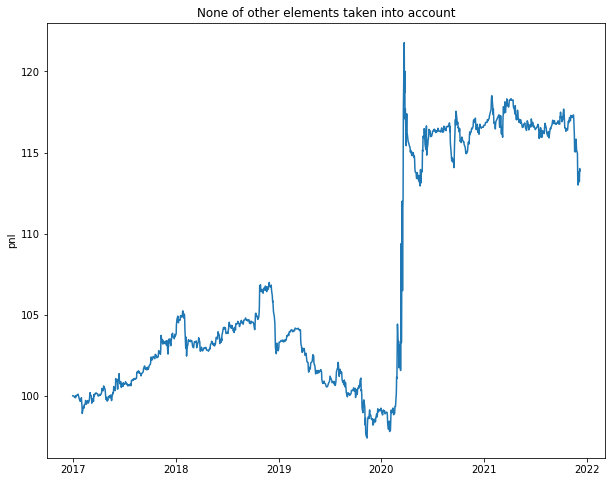

In [6]:
plt.figure(figsize=(10,8))
plt.title("None of other elements taken into account")
plt.ylabel("pnl")
plt.plot(pnl_none)
plt.savefig("pnl_none")
plt.show()

In [8]:
get_all(pnl_r)

0.05409818205788544
Sharp Ratio is 0.7396412597673587, Maximum Dropdown is -0.06397822940885867, Cumulative Return is 0.30611372388920133


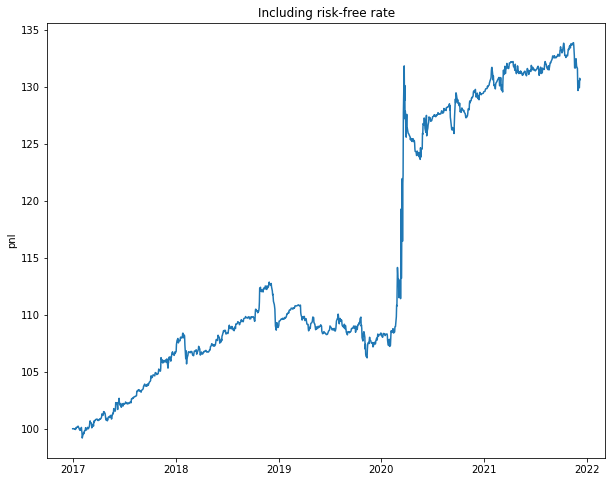

In [9]:
plt.figure(figsize=(10,8))
plt.title("Including risk-free rate")
plt.ylabel("pnl")
plt.plot(pnl_r)
plt.savefig("pnl_r")
plt.show()

In [29]:
get_all(pnl_rd)

0.05412913727911035
Sharp Ratio is 0.7401997546502537, Maximum Dropdown is -0.0639776940131217, Cumulative Return is 0.306313327285807


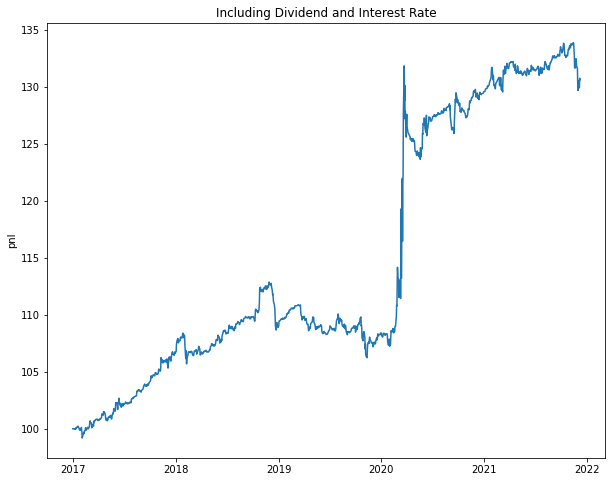

In [28]:
plt.figure(figsize=(10,8))
plt.title("Including Dividend and Interest Rate")
plt.ylabel("pnl")
plt.plot(pnl_rd)
plt.savefig("pnl_rd")
plt.show()

In [10]:
get_all(pnl_all)

0.030625226645457346
Sharp Ratio is 0.3885604568880919, Maximum Dropdown is -0.08717761686421965, Cumulative Return is 0.1632079639871914


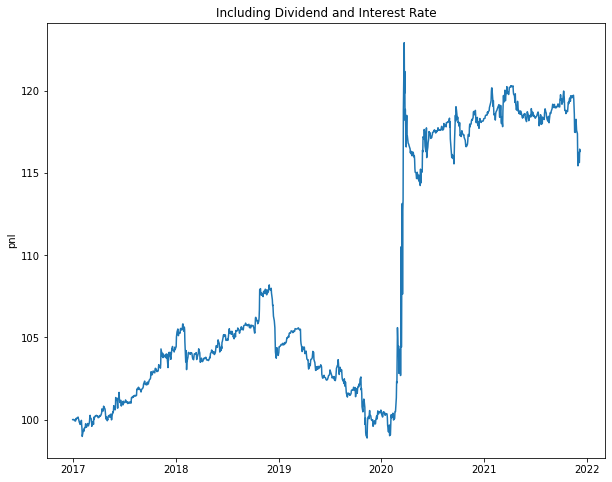

In [31]:
plt.figure(figsize=(10,8))
plt.title("Including Dividend and Interest Rate")
plt.ylabel("pnl")
plt.plot(pnl_all)
plt.savefig("pnl_all")
plt.show()